# Hierarchical/Agglomerative Clusting

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score, davies_bouldin_score

import random
import numpy as np

SEED = 42


In [3]:
merged_df = pd.read_csv('merged_df.csv')

# drop unnecessary columns
df = merged_df.drop(['track_name', 'artist_name', 'album_name_x', 'album_name_y'], axis=1)

# drop all nan or missing values
df = df.dropna().copy()
print(df['time_window'].unique())
print("\n", len(df))

['12AM–3AM' '3AM–6AM' '6AM–9AM' '6PM–9PM' '9PM–12AM' '9AM–12PM' '3PM–6PM'
 '12PM–3PM']

 95039


In [4]:
# features that will be used in clustering
features = ['time_window', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 
            'acousticness','instrumentalness', 'valence', 'tempo']

# encode categorical values for every 3 hours in time_window
time_order = ['12AM–3AM', '3AM–6AM', '6AM–9AM', '9AM–12PM', '12PM–3PM', '3PM–6PM','6PM–9PM', '9PM–12AM']
cat = pd.Categorical(df['time_window'], categories=time_order, ordered=True)

# Encode to number
df['times_encoded'] = cat.codes
print(df[['time_window', 'times_encoded']].value_counts())

# get random sample of dataset to reduce number of records for hierarchical/agglomerative clustering
random_df = df.sample(n=3000, random_state=SEED)
print(len(random_df))

time_window  times_encoded
12AM–3AM     0                19143
9PM–12AM     7                17991
6PM–9PM      6                16893
3AM–6AM      1                14478
3PM–6PM      5                12060
6AM–9AM      2                 8997
12PM–3PM     4                 3168
9AM–12PM     3                 2309
Name: count, dtype: int64
3000


In [5]:
# features that will be used in clustering
#print(df.dtypes)
X = random_df[['times_encoded', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'valence', 'tempo']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

3 clusters: {0: 2993, 1: 5, 2: 2}
4 clusters: {0: 2987, 1: 6, 3: 5, 2: 2}
8 clusters: {0: 2980, 1: 6, 3: 5, 4: 3, 5: 2, 2: 2, 6: 1, 7: 1}

2 clusters -> Silhouette: 0.611, DB: 0.363
3 clusters -> Silhouette: 0.465, DB: 0.452
4 clusters -> Silhouette: 0.467, DB: 0.464



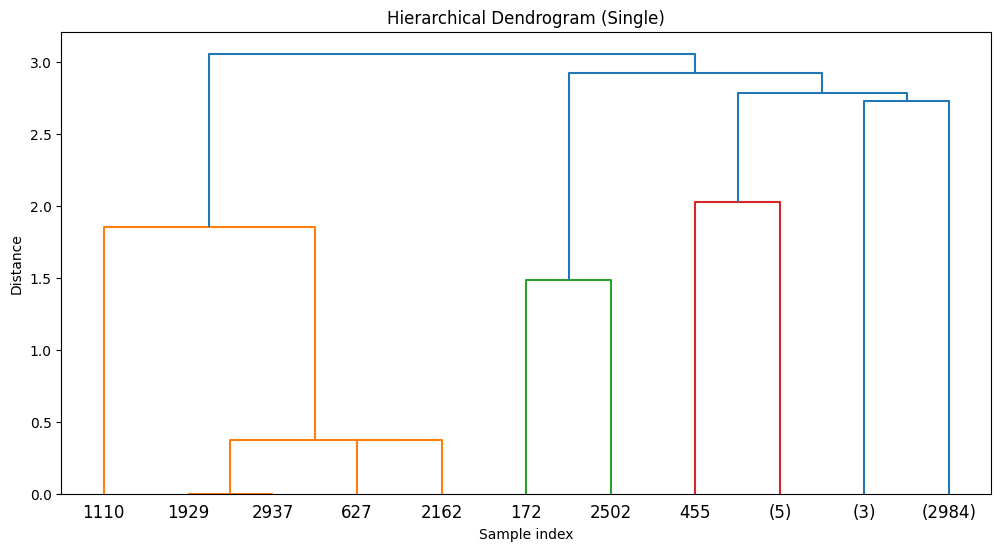

In [6]:
# Single linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())

print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='single')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")
    
print()

# dendrogram
linked = linkage(X_scaled, method='single')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=3)
plt.title("Hierarchical Dendrogram (Single)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

3 clusters: {2: 2228, 0: 739, 1: 33}
4 clusters: {0: 2228, 2: 734, 1: 33, 3: 5}
8 clusters: {3: 1462, 0: 679, 4: 642, 6: 92, 1: 87, 2: 27, 5: 6, 7: 5}

2 clusters -> Silhouette: 0.566, DB: 0.776
3 clusters -> Silhouette: 0.232, DB: 1.289
4 clusters -> Silhouette: 0.226, DB: 1.221



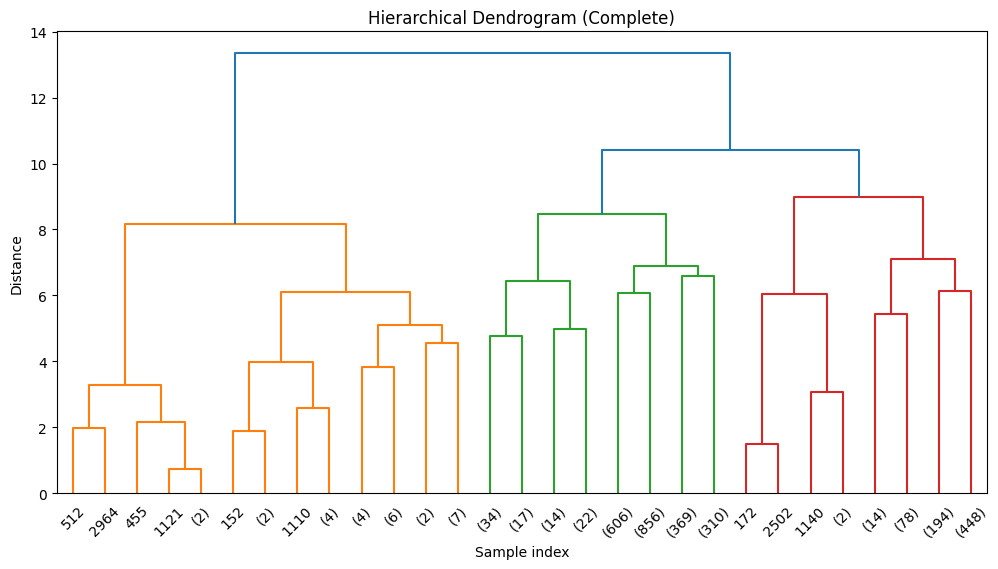

In [7]:
# Complete linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())

print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")
    
print()

# dendrogram
linked = linkage(X_scaled, method='complete')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Complete)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [8]:
# Ward linkage
for k in [3,4,8]:
    h_cluster = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = h_cluster.fit_predict(X_scaled)
    print(f"{k} clusters:", pd.Series(labels).value_counts().to_dict())
    
print()

for k in [2,3,4]:
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_scaled)
    sil = silhouette_score(X_scaled, labels)
    db = davies_bouldin_score(X_scaled, labels)
    print(f"{k} clusters -> Silhouette: {sil:.3f}, DB: {db:.3f}")

3 clusters: {0: 1351, 2: 1232, 1: 417}
4 clusters: {2: 1232, 0: 1191, 3: 417, 1: 160}
8 clusters: {5: 546, 2: 515, 4: 434, 3: 417, 1: 343, 6: 333, 7: 252, 0: 160}

2 clusters -> Silhouette: 0.264, DB: 1.300
3 clusters -> Silhouette: 0.157, DB: 1.940
4 clusters -> Silhouette: 0.177, DB: 1.646


The silhouette scores close to 0 show there may be some overlap in the clustering. A lower Davies Bouldin is better so overall 4 clusters seems to be the best parameter for ward linkage. Complete linkage seems to perform a little better than ward while single has better scores. Single however leads to chaining so I don't think we should use that. Due to explainability, we will chose ward.

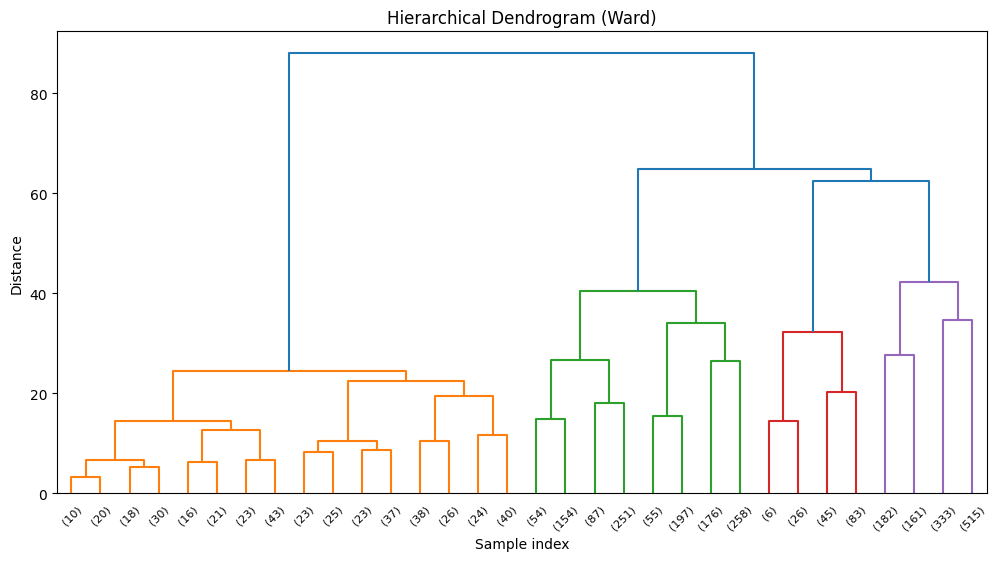

In [9]:
# dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=4)
plt.title("Hierarchical Dendrogram (Ward)")
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()


Looks like we have 3 good clusters maybe 4 in this sample of 3000 rows in the data. Changing the 3000 randomly picked samples fluctuates between 3 and 4, so need to look at other metrics as well.

In [10]:
complete_cluster = AgglomerativeClustering(n_clusters=3, linkage='complete')
complete_labels = complete_cluster.fit_predict(X_scaled)

random_df['cluster_label_complete'] = complete_labels
print(random_df['cluster_label_complete'].value_counts())

print()

ward_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
ward_labels = ward_cluster.fit_predict(X_scaled)

random_df['cluster_label_ward'] = ward_labels
print(random_df['cluster_label_ward'].value_counts())

cluster_label_complete
2    2228
0     739
1      33
Name: count, dtype: int64

cluster_label_ward
2    1232
0    1191
3     417
1     160
Name: count, dtype: int64


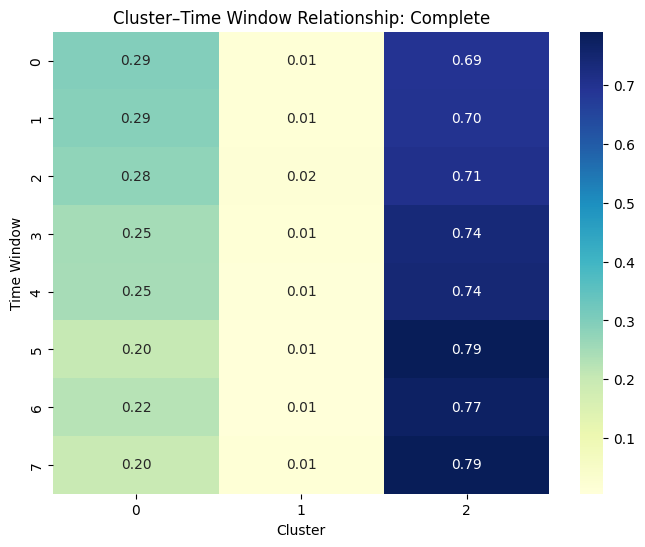

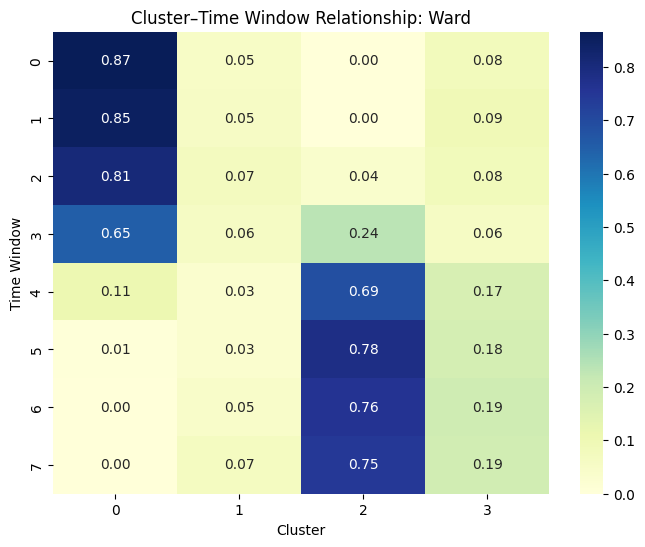

In [11]:
# time windows and cluster relationships: 0 = 12AM-3AM and so on
# complete
heat = pd.crosstab(random_df['times_encoded'], random_df['cluster_label_complete'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster–Time Window Relationship: Complete')
plt.xlabel('Cluster')
plt.ylabel('Time Window')
plt.show()


# ward
heat = pd.crosstab(random_df['times_encoded'], random_df['cluster_label_ward'], normalize='index')

plt.figure(figsize=(8,6))
sns.heatmap(heat, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Cluster–Time Window Relationship: Ward')
plt.xlabel('Cluster')
plt.ylabel('Time Window')
plt.show()


### Complete obviously doesn't give us much to go off of so the rest of the analysis will be done with the ward linkage method.

Only 3000 samples taken from the data: Heatmap shows that using the given features (energy, loudness, speechiness, acousticness, valence, and tempo) do have some mild patterns accross times. 

- Cluster 0 contains songs that are more common from midnight to noon with some overlap with cluster 2.

- Cluster 1 songs are less common throughout the whole day. 

- Cluster 2 songs are played from noon to midnight with some overlap with cluster 0.

- Cluster 3 shows some increase in songs from noon to midnight but less than cluster 2.

From here we don't know which song attributes are causing these differences.

### Can we see which attributes are causing the largest effect?

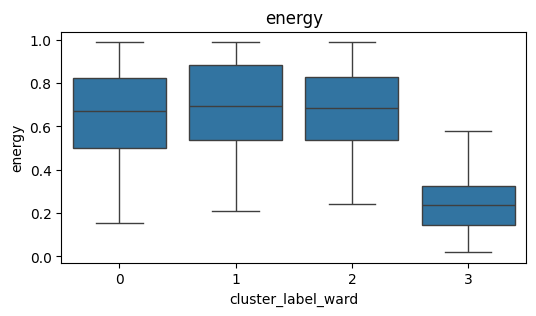

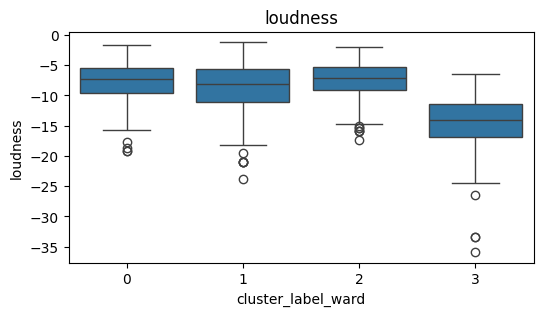

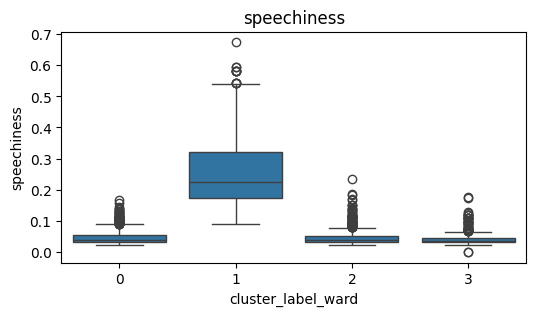

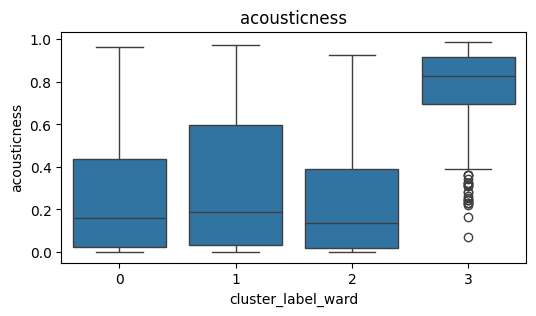

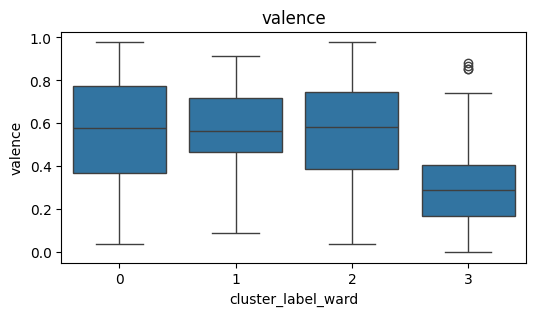

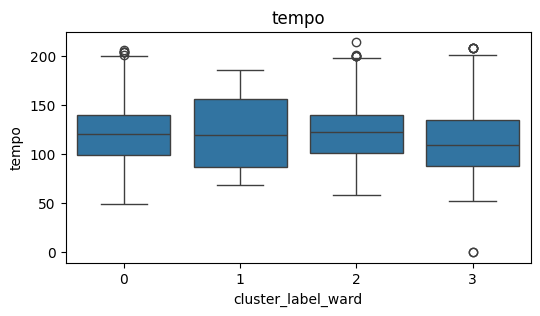

In [12]:
song_attributes = ['energy','loudness','speechiness','acousticness','valence','tempo']

# get means and medians aggregated by cluster labels
cluster_means = random_df.groupby('cluster_label_ward')[song_attributes].mean()
cluster_medians = random_df.groupby('cluster_label_ward')[song_attributes].median()
# print("Means:\n", cluster_means)
# print("Medians:\n", cluster_medians)

# Heatmap of mean feature values per cluster
# plt.figure(figsize=(8,4))
# sns.heatmap(cluster_means.T, annot=True, fmt=".2f", cmap='vlag')
# plt.title("Cluster feature means")
# plt.xlabel("Cluster")
# plt.ylabel("Feature")
# plt.show()

# boxplots for each feature comparing clusters
cols = ['energy','loudness','speechiness','acousticness','valence','tempo']
for col in cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x='cluster_label_ward', y=col, data=random_df)
    plt.title(col)
    plt.show()

The above box plots show the mean distributions of the song attributes in each cluster. Tempo seems to stay about the same throughout the day in all clusters. Valence, energy, and loudness are lower in cluster 3 than the other clusters. An interesting note is the speechiness of songs in cluster 1 is much higher. May need to look into this more.

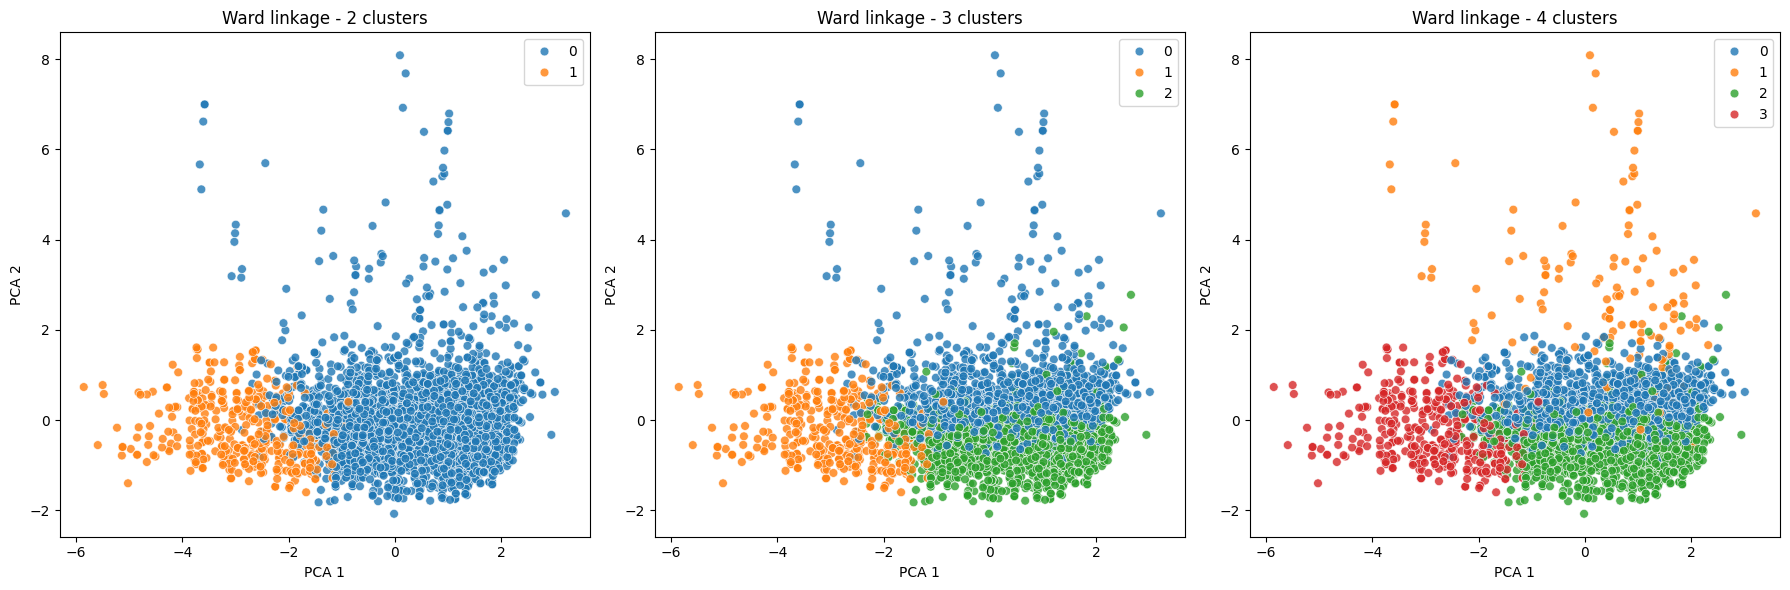

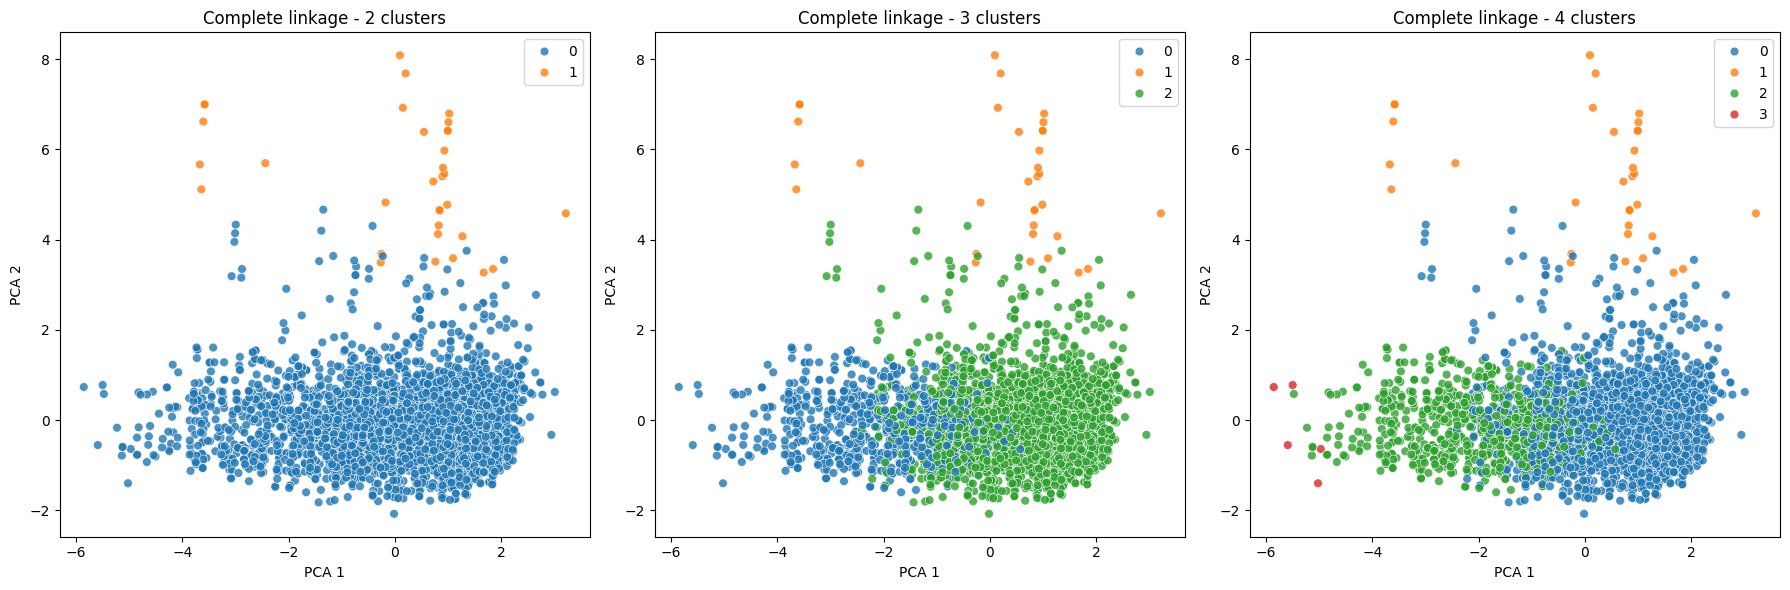

In [16]:
# PCA: ward linkage
pca_df = df.sample(n=3000, random_state=SEED)
pca_X = pca_df[['times_encoded', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'valence', 'tempo']]

# Scale data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, k in zip(axes, [2, 3, 4]):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agglo.fit_predict(X_scaled)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,
                    palette='tab10', s=40, alpha=0.8, ax=ax)
    ax.set_title(f'Ward linkage - {k} clusters')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


# PCA: complete linkage

fig, axes = plt.subplots(1, 3, figsize=(18,6))

for ax, k in zip(axes, [2, 3, 4]):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='complete')
    labels = agglo.fit_predict(X_scaled)
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels,
                    palette='tab10', s=40, alpha=0.8, ax=ax)
    ax.set_title(f'Complete linkage - {k} clusters')
    ax.set_xlabel('PCA 1')
    ax.set_ylabel('PCA 2')

plt.tight_layout()
plt.show()


We do see some separation from PCA but quite a bit of overlap which was expected with the silhouette scores closer to 0 than 1. Using 4 clusters which has the best cluster qualities by scores, we see fairly distinct clustering. Either 3 or 4 does the best clustering. I'm wondering if DBSCAN would show something interesting here?

,PC1,PC2,PC3
times_encoded,-0.035205,-0.513274,0.599661
energy,0.590443,0.010900,-0.014875
loudness,0.543464,-0.163550,-0.048409
speechiness,0.051921,0.738246,0.344778
acousticness,-0.509273,0.168810,0.025251
valence,0.264548,0.334118,-0.200755
tempo,0.150811,0.156664,0.691398


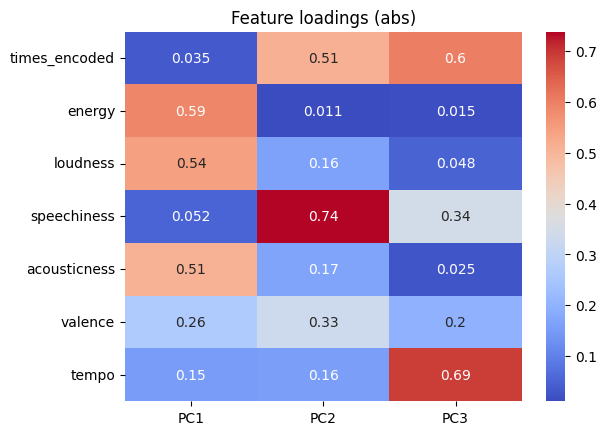

In [17]:
loadings = pd.DataFrame(pca.components_.T,
                        index=['times_encoded','energy','loudness','speechiness','acousticness','valence','tempo'],
                        columns=[f'PC{i+1}' for i in range(pca.n_components_)])
display(loadings)

# heatmap: used absolute values to better compare the components having the largest effects
sns.heatmap(loadings.abs(), annot=True, cmap='coolwarm')
plt.title('Feature loadings (abs)'); plt.show()

PC1 is most affected by the energy, loudness, and acousticness of the songs. Given what we know about these 3 attributes, I think it's safe to say this principle component is most affected by the song tone/energy. 

PC2 is most affected by the speechiness and valence. 

PC3 is interesting because this is the only component that is largely affected by the time windows and minimally influenced by tempo. This indicates that the songs in this cluster are not really distinguishable and may include more outliers than anything else. Our times are not really affecting the outcomes of our other PC's and time windows may not be a good clustering addition overall.

## Extra scatter plots of each attribute over time

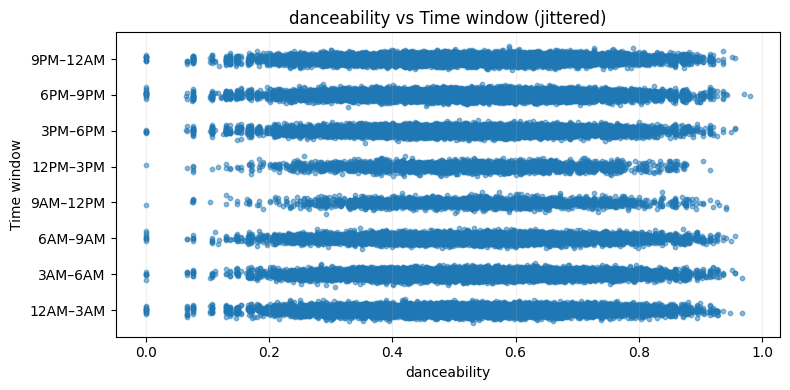

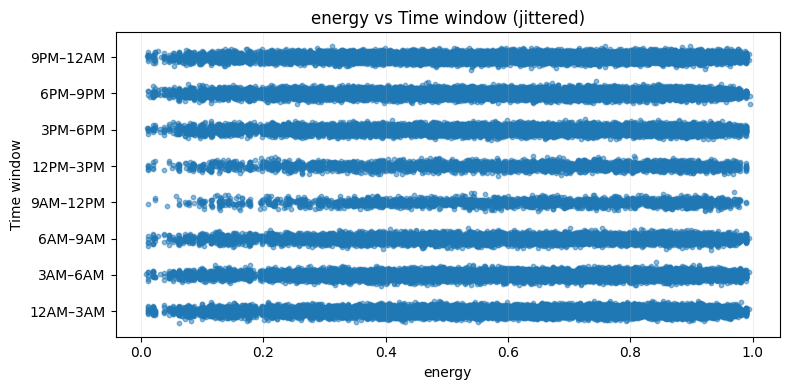

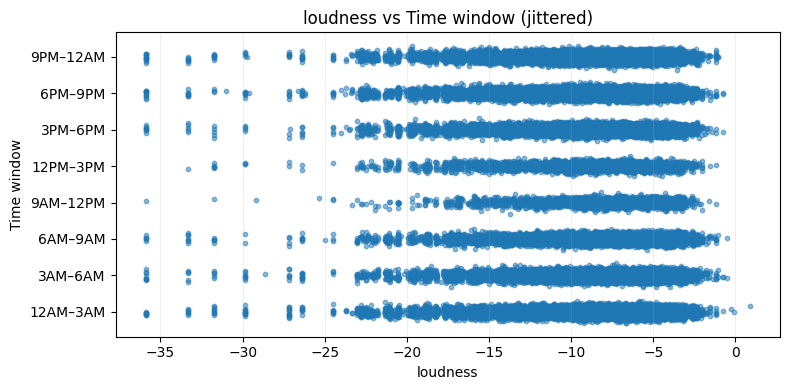

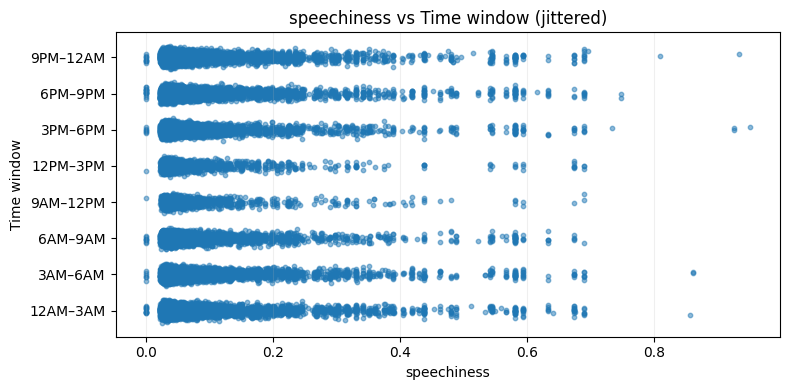

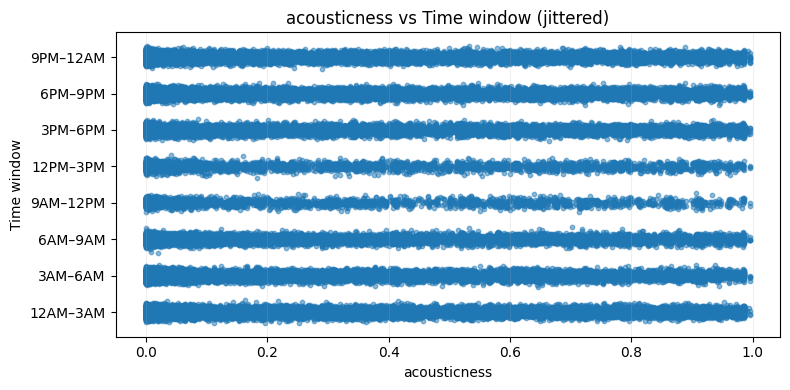

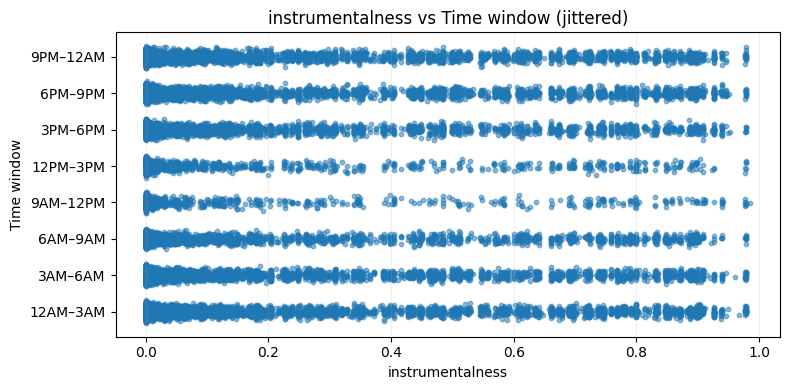

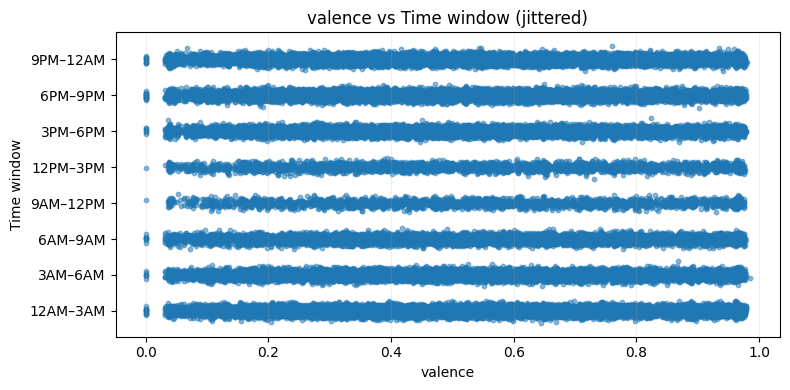

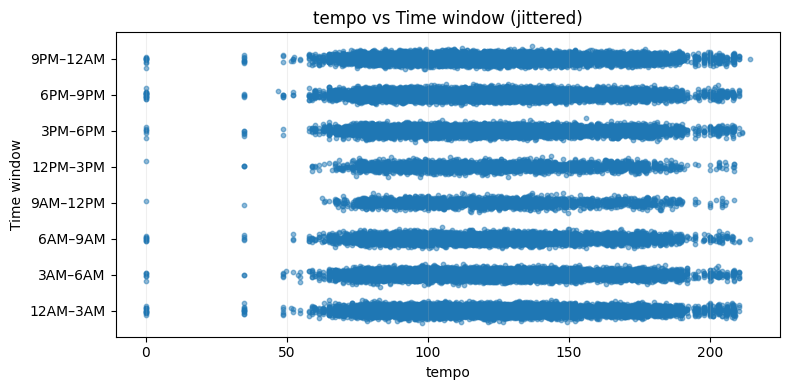

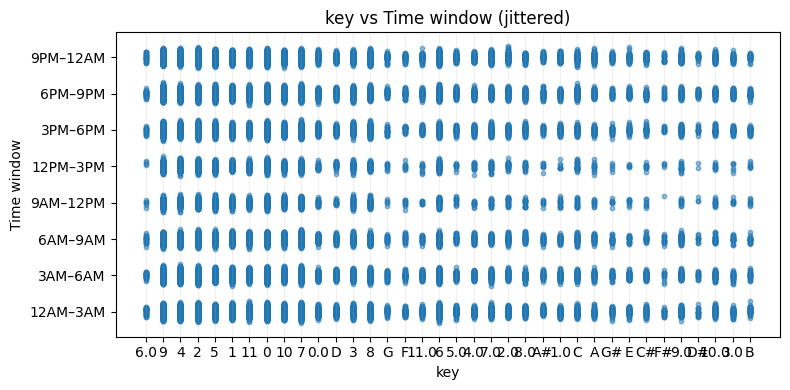

In [15]:
# scatter plots
# ...existing code...
# scatter: x = attribute, y = times_encoded (one figure per attribute)
attrs = ['danceability','energy','loudness','speechiness',
         'acousticness','instrumentalness','valence','tempo','key']

time_order = ['12AM–3AM','3AM–6AM','6AM–9AM','9AM–12PM',
              '12PM–3PM','3PM–6PM','6PM–9PM','9PM–12AM']

# ensure times_encoded exists
if 'times_encoded' not in df.columns:
    cat = pd.Categorical(df['time_window'], categories=time_order, ordered=True)
    df['times_encoded'] = cat.codes

rng = np.random.RandomState(SEED)

for attr in attrs:
    plot_df = df.dropna(subset=[attr, 'time_window']).copy()
    if plot_df.empty:
        print(f"no data for {attr}, skipping")
        continue

    y_jitter = plot_df['times_encoded'].values + rng.normal(loc=0, scale=0.08, size=len(plot_df))
    x_vals = plot_df[attr].values

    plt.figure(figsize=(8,4))
    plt.scatter(x_vals, y_jitter, s=10, alpha=0.5, color='tab:blue')
    plt.yticks(ticks=range(len(time_order)), labels=time_order)
    plt.xlabel(attr)
    plt.ylabel('Time window')
    plt.title(f'{attr} vs Time window (jittered)')
    plt.grid(axis='x', alpha=0.2)
    plt.tight_layout()
    plt.show()
# ...existing code...